***AutoML***




Ping Chen

Implement Library

In [1]:
!apt-get install default-jre 
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 4 not upgraded.
openjdk version "11.0.16" 2022-07-19
OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04)
OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)


In [2]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 177.4 MB 32 kB/s 
  Created wheel for h2o: filename=h2o-3.38.0.2-py2.py3-none-any.whl size=177521195 sha256=1c4b62d3f8db2772ff46dbc1736bf138729fedf610631b98bab8bc955ed4b3b7
  Stored in directory: /root/.cache/pip/wheels/e4/ef/ab/a9b2e452e18b3dfea0b6114bc57c3b9e8b0e464eb2d03230e1
Successfully built h2o


In [3]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.16" 2022-07-19; OpenJDK Runtime Environment (build 11.0.16+8-post-Ubuntu-0ubuntu118.04); OpenJDK 64-Bit Server VM (build 11.0.16+8-post-Ubuntu-0ubuntu118.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpc23lu64w
  JVM stdout: /tmp/tmpc23lu64w/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpc23lu64w/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,"7 days, 4 hours and 36 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_eyg4v2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.172 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
url = "https://raw.githubusercontent.com/Yusong-Zhang/Python/master/AirQualityUCI%20T.csv"
df = h2o.import_file(path = url)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Data Overview

In [6]:
# return an output of the dataframe
df.head()

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,nan,nan
2004-03-10 00:00:00,1970-01-01 19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,nan,nan
2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502,nan,nan
2004-03-10 00:00:00,1970-01-01 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867,nan,nan
2004-03-10 00:00:00,1970-01-01 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,nan,nan
2004-03-10 00:00:00,1970-01-01 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,nan,nan
2004-03-11 00:00:00,1970-01-01 00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,nan,nan
2004-03-11 00:00:00,1970-01-01 01:00:00,1,1136,31,3.3,672,62,1453,76,1333,730,10.7,60,0.7702,nan,nan
2004-03-11 00:00:00,1970-01-01 02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,nan,nan
2004-03-11 00:00:00,1970-01-01 03:00:00,0.6,1010,19,1.7,561,-200,1705,-200,1235,501,10.3,60.2,0.7517,nan,nan


In [7]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

In [8]:
# return an output type of the dataframe
df.types

{'Date': 'time',
 'Time': 'time',
 'CO(GT)': 'real',
 'PT08.S1(CO)': 'int',
 'NMHC(GT)': 'int',
 'C6H6(GT)': 'real',
 'PT08.S2(NMHC)': 'int',
 'NOx(GT)': 'int',
 'PT08.S3(NOx)': 'int',
 'NO2(GT)': 'int',
 'PT08.S4(NO2)': 'int',
 'PT08.S5(O3)': 'int',
 'T': 'real',
 'RH': 'real',
 'AH': 'real',
 'C16': 'int',
 'C17': 'int'}

In [9]:
df.describe()

Rows:9471
Cols:17

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
type,time,time,real,int,int,real,int,int,int,int,int,int,real,real,real,int,int
mins,1078876800000.0,0.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,-200.0,NaN,NaN
mean,1095741005193.9729,41394806.027572945,-34.20752377898901,1048.990060916961,-159.09009297851875,1.8656834455487874,894.5952762637594,168.61697125146938,794.990167788821,58.148872501870244,1391.4796409105481,975.0720316340708,9.77830501229027,39.48537992946456,-6.837603644330444,0.0,0.0
maxs,1112572800000.0,82800000.0,11.9,2040.0,1189.0,63.7,2214.0,1479.0,2683.0,340.0,2775.0,2523.0,44.6,88.7,2.231,NaN,NaN
sigma,9724648294.22172,24923453.80027478,77.65717034683163,329.8327098861881,139.78909289678148,41.38020643630012,342.3332516496718,257.4338662910737,321.99355160311603,126.9404552589075,467.21012455706364,456.93818447398843,43.203623062623194,51.21614497176605,38.97667016632423,-0.0,-0.0
zeros,0,390,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
missing,114,114,114,114,114,114,114,114,114,114,114,114,114,114,114,9471,9471
0,2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,nan,nan
1,2004-03-10 00:00:00,1970-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,nan,nan
2,2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,nan,nan


Data Clean

In [10]:
#some values are marked as -200 so we need to remove them
mask = df['CO(GT)'] > -200
s1 = df[mask,:]
s1.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr(rows <Expr()#AirQualityUCI_20T.hex> <Expr(> <Expr(cols_py <Expr()#AirQualityUCI_20T.hex> 'CO(GT)'); scalar> -200); scalar>); scalar>})>

In [11]:
mask = s1['PT08.S1(CO)'] > -200
s2 = s1[mask,:]
s2.describe

<bound method H2OFrame.describe of H2OFrame({'_ex': <Expr(rows <Expr(rows <Expr()#AirQualityUCI_20T.hex> <Expr(> <Expr(cols_py <Expr()#AirQualityUCI_20T.hex> 'CO(GT)'); scalar> -200)#py_2_sid_9838; scalar>)#py_3_sid_9838> <Expr(> <Expr(cols_py <Expr(rows <Expr()#AirQualityUCI_20T.hex> <Expr(> <Expr(cols_py <Expr()#AirQualityUCI_20T.hex> 'CO(GT)'); scalar> -200)#py_2_sid_9838; scalar>)#py_3_sid_9838> 'PT08.S1(CO)'); scalar> -200); scalar>); scalar>})>

In [ ]:
mask = s2['C6H6(GT)'] > -200
s3 = s2[mask,:]
s3.describe

In [ ]:
mask = s3['PT08.S2(NMHC)'] > -200
s4 = s3[mask,:]
s4.describe

In [ ]:
mask = s4['NOx(GT)'] > -200
s5 = s4[mask,:]
s5.describe

In [ ]:
mask = s5['PT08.S3(NOx)'] > -200
s6 = s5[mask,:]
s6.describe

In [ ]:
mask = s6['NO2(GT)'] > -200
s7 = s6[mask,:]
s7.describe

In [ ]:
mask = s7['PT08.S4(NO2)'] > -200
s8 = s7[mask,:]
s8.describe

In [ ]:
mask = s8['PT08.S5(O3)'] > -200
s9 = s8[mask,:]
s9.describe

In [ ]:
mask = s9['T'] > -200
s10 = s9[mask,:]
s10.describe

In [ ]:
mask = s10['RH'] > -200
s11 = s10[mask,:]
s11.describe

In [ ]:
# the final removed code and now the dataset become s12
mask = s11['AH'] > -200
s12 = s11[mask,:]
s12.describe

In [22]:
s12.describe()

Rows:6941
Cols:17

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
type,time,time,real,int,int,real,int,int,int,int,int,int,real,real,real,int,int
mins,1078876800000.0,0.0,0.1,647.0,-200.0,0.2,390.0,2.0,322.0,2.0,551.0,221.0,-1.9,9.2,0.1847,NaN,NaN
mean,1096292667454.2573,43272612.01555972,2.182466503385679,1119.9132689814148,-148.64457570955193,10.554487825961674,958.543005330644,250.6719492868464,816.8933871200115,113.87408154444604,1452.6488978533353,1057.7565192335398,17.75532344042645,48.881904624693846,0.9855727416798732,0.0,0.0
maxs,1112572800000.0,82800000.0,11.9,2040.0,1189.0,63.7,2214.0,1479.0,2683.0,333.0,2775.0,2523.0,44.6,88.7,2.1806,NaN,NaN
sigma,10209950756.50728,24530127.460908916,1.4411578844974917,218.73375371137746,157.07675309957494,7.4652263285217915,264.05500158779716,208.61137082789276,251.89719985517954,47.47501685972731,353.30157566388084,406.5099568661767,8.844908952625895,17.433193302036663,0.4010966206986037,-0.0,-0.0
zeros,0,308,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6941,6941
0,2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,nan,nan
1,2004-03-10 00:00:00,1970-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,nan,nan
2,2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,nan,nan


In [23]:
s12.shape

(6941, 17)

In [24]:
# Create a 75/25 train/test splie
pct_rows=0.75
s12_train, s12_test = s12.split_frame([pct_rows])

In [25]:
print(s12_train.shape)
print(s12_test.shape)

(5230, 17)
(1711, 17)


In [26]:
# return an output of the dataframe
s12_train.head()

Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360,150,11.9,1046,166,1056,113,1692,1268,13.6,48.9,0.7578,nan,nan
2004-03-10 00:00:00,1970-01-01 19:00:00,2,1292,112,9.4,955,103,1174,92,1559,972,13.3,47.7,0.7255,nan,nan
2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402,88,9,939,131,1140,114,1555,1074,11.9,54,0.7502,nan,nan
2004-03-10 00:00:00,1970-01-01 21:00:00,2.2,1376,80,9.2,948,172,1092,122,1584,1203,11,60,0.7867,nan,nan
2004-03-10 00:00:00,1970-01-01 22:00:00,1.6,1272,51,6.5,836,131,1205,116,1490,1110,11.2,59.6,0.7888,nan,nan
2004-03-10 00:00:00,1970-01-01 23:00:00,1.2,1197,38,4.7,750,89,1337,96,1393,949,11.2,59.2,0.7848,nan,nan
2004-03-11 00:00:00,1970-01-01 00:00:00,1.2,1185,31,3.6,690,62,1462,77,1333,733,11.3,56.8,0.7603,nan,nan
2004-03-11 00:00:00,1970-01-01 01:00:00,1,1136,31,3.3,672,62,1453,76,1333,730,10.7,60,0.7702,nan,nan
2004-03-11 00:00:00,1970-01-01 02:00:00,0.9,1094,24,2.3,609,45,1579,60,1276,620,10.7,59.7,0.7648,nan,nan
2004-03-11 00:00:00,1970-01-01 05:00:00,0.7,1066,8,1.1,512,16,1918,28,1182,422,11,56.2,0.7366,nan,nan


In [27]:
s12_train.describe()

Rows:5230
Cols:17

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,C16,C17
type,time,time,real,int,int,real,int,int,int,int,int,int,real,real,real,int,int
mins,1078876800000.0,0.0,0.1,647.0,-200.0,0.2,397.0,2.0,325.0,2.0,561.0,225.0,-1.9,9.2,0.1847,NaN,NaN
mean,1096306537973.2308,43445047.80114723,2.188432122370936,1120.0430210325046,-147.43824091778197,10.552351816443595,958.9588910133841,250.99158699808797,815.817017208413,113.87724665391976,1452.5627151051626,1057.8460803059272,17.733479923518164,48.92302103250477,0.9856938623326957,0.0,0.0
maxs,1112572800000.0,82800000.0,11.9,2008.0,1129.0,63.7,2214.0,1479.0,2542.0,333.0,2746.0,2523.0,44.6,88.7,2.1806,NaN,NaN
sigma,10232693370.477268,24577951.623604614,1.4341509991735761,217.24358837852787,158.6956548630335,7.417699471980408,262.4456261151375,207.66029420018387,250.05164273852347,47.212797307050884,352.35690512395837,405.3986950517181,8.803323791894094,17.449928083136978,0.4029355671639208,-0.0,-0.0
zeros,0,237,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5230,5230
0,2004-03-10 00:00:00,1970-01-01 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,nan,nan
1,2004-03-10 00:00:00,1970-01-01 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,nan,nan
2,2004-03-10 00:00:00,1970-01-01 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,nan,nan


In [28]:
# Set the features and target
X=s12.columns
print(X)

['Date', 'Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'RH', 'AH', 'C16', 'C17']


In [29]:
# Set target and predictor variables
y='T'
X.remove(y) 
X.remove('Date')
X.remove("Time")
X.remove('C16')
X.remove('C17')
X.remove('NMHC(GT)')

print(X)


['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']


In [30]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6 
run_time=222

In [31]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


In [32]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [33]:
gbm_params1 = {'learn_rate': [0.01, 0.1],
                'max_depth': [3, 5, 9],
                'sample_rate': [0.8, 1.0],
                'col_sample_rate': [0.2, 0.5, 1.0]}

In [34]:
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=X, y=y,
                training_frame=s12_train,
                validation_frame=s12_test,
                ntrees=100,
                seed=1)

gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,residual_deviance
,1.0,0.1,9.0,0.8,gbm_grid1_model_18,0.0477888
,1.0,0.1,9.0,1.0,gbm_grid1_model_36,0.0552215
,1.0,0.1,5.0,0.8,gbm_grid1_model_12,0.0991365
,1.0,0.1,5.0,1.0,gbm_grid1_model_30,0.1036601
,1.0,0.1,3.0,1.0,gbm_grid1_model_24,0.2917608
,1.0,0.1,3.0,0.8,gbm_grid1_model_6,0.3058264
,0.5,0.1,9.0,0.8,gbm_grid1_model_17,0.3778339
,0.5,0.1,9.0,1.0,gbm_grid1_model_35,0.3922024
,0.5,0.1,5.0,1.0,gbm_grid1_model_29,0.4164274
,0.5,0.1,5.0,0.8,gbm_grid1_model_11,0.4405302


In [35]:
gbm_gridperf1 = gbm_grid1.get_grid( sort_by='mse',decreasing=False)


In [36]:
gbm_gridperf1


,col_sample_rate,learn_rate,max_depth,sample_rate,model_ids,mse
,1.0,0.1,9.0,0.8,gbm_grid1_model_18,0.0477888
,1.0,0.1,9.0,1.0,gbm_grid1_model_36,0.0552215
,1.0,0.1,5.0,0.8,gbm_grid1_model_12,0.0991365
,1.0,0.1,5.0,1.0,gbm_grid1_model_30,0.1036601
,1.0,0.1,3.0,1.0,gbm_grid1_model_24,0.2917608
,1.0,0.1,3.0,0.8,gbm_grid1_model_6,0.3058264
,0.5,0.1,9.0,0.8,gbm_grid1_model_17,0.3778339
,0.5,0.1,9.0,1.0,gbm_grid1_model_35,0.3922024
,0.5,0.1,5.0,1.0,gbm_grid1_model_29,0.4164274
,0.5,0.1,5.0,0.8,gbm_grid1_model_11,0.4405302


In [37]:
best_gbm1 = gbm_gridperf1.models[0]

In [38]:
best_gbm_perf1 = best_gbm1.model_performance(s12_test)
best_gbm_perf1.mse


<bound method MetricsBase.mse of H2ORegressionModelMetrics({'_metric_json': {'__meta': {'schema_version': 3, 'schema_name': 'ModelMetricsRegressionV3', 'schema_type': 'ModelMetricsRegression'}, 'model': {'__meta': {'schema_version': 3, 'schema_name': 'ModelKeyV3', 'schema_type': 'Key<Model>'}, 'name': 'gbm_grid1_model_18', 'type': 'Key<Model>', 'URL': '/3/Models/gbm_grid1_model_18'}, 'model_checksum': 4232476333383707840, 'frame': {'__meta': {'schema_version': 3, 'schema_name': 'FrameKeyV3', 'schema_type': 'Key<Frame>'}, 'name': 'py_28_sid_9838', 'type': 'Key<Frame>', 'URL': '/3/Frames/py_28_sid_9838'}, 'frame_checksum': -7813826229203890052, 'description': None, 'model_category': 'Regression', 'scoring_time': 1667507619360, 'predictions': None, 'MSE': 0.047788825828423434, 'RMSE': 0.21860655486152156, 'nobs': 1711, 'custom_metric_name': None, 'custom_metric_value': 0.0, 'r2': 0.9994061241613494, 'mean_residual_deviance': 0.047788825828423434, 'mae': 0.14095671936470613, 'rmsle': 'NaN'

In [39]:
air_glm = H2OGeneralizedLinearEstimator( lambda_ = 0,
                        remove_collinear_columns = True,
                          compute_p_values = True)

In [40]:
air_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)

glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1667507530352_1


GLM Model: summary
    family    link      regularization    number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  None              11                            11                             1                       py_27_sid_9838

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5.381398766303806
RMSE: 2.319784206839896
MAE: 1.7330995846829758
RMSLE: NaN
Mean Residual Deviance: 5.381398766303806
R^2: 0.9305479817767031
Null degrees of freedom: 5229
Residual degrees of freedom: 5218
Null deviance: 405239.7074665335
Residual deviance: 28144.715547768905
AIC: 23669.916844757732

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5.609249919994379
RMSE: 2.368385509159009
MAE: 1.7658793108424014
RMSLE: NaN
Mean Residual Deviance: 5.609249919994379
R^2: 0.9302933699941162
Null degrees of freedom: 1710
Residual degrees of freedom: 1699
Null deviance: 137696.5594821324
Residual deviance: 9597.426613110381
AIC: 7832.085158738636

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse      training_deviance    training_mae        training_r2         validation_rmse    validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  -----------------  -------------------  ------------------  ------------------  -----------------  ---------------------  ------------------  ------------------
    2022-11-03 20:33:39  0.000 sec   0             405239.70766539196         77.48369171422408
    2022-11-03 20:33:39  0.185 sec   1                                                           2.319784206839896  5.381398766303806    1.7330995846829758  0.9305479817767031  2.368385509159009  5.609249919994379      1.7658793108424014  0.9302933699941162

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
RH             5.91719                1                    0.274139
AH             5.5691                 0.941173             0.258012
PT08.S4(NO2)   2.45571                0.415012             0.113771
C6H6(GT)       2.44751                0.413627             0.113391
PT08.S2(NMHC)  2.11818                0.35797              0.0981334
PT08.S5(O3)    1.05304                0.177962             0.0487864
CO(GT)         0.912635               0.154234             0.0422816
NOx(GT)        0.888984               0.150238             0.0411859
PT08.S1(CO)    0.182863               0.0309036            0.00847188
NO2(GT)        0.0274395              0.00463725           0.00127125
PT08.S3(NOx)   0.0120198              0.00203133           0.000556867

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [41]:
air_glm = H2OGeneralizedLinearEstimator(   lambda_= 1,
                        remove_collinear_columns = True,
                          )
air_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)

glm Model Build progress: |

/usr/local/lib/python3.7/dist-packages/h2o/estimators/estimator_base.py:193: RuntimeWarning: remove_collinear_columns should only be used with no regularization, i.e. lambda=0.0.  It is used improperly here.  Please set lambda=0.
  warnings.warn(mesg["message"], RuntimeWarning)


██████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGeneralizedLinearEstimator : Generalized Linear Modeling
Model Key: GLM_model_python_1667507530352_2


GLM Model: summary
    family    link      regularization                            number_of_predictors_total    number_of_active_predictors    number_of_iterations    training_frame
--  --------  --------  ----------------------------------------  ----------------------------  -----------------------------  ----------------------  ----------------
    gaussian  identity  Elastic Net (alpha = 0.5, lambda = 1.0 )  11                            7                              1                       py_27_sid_9838

ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5.601209046729513
RMSE: 2.3666873571998295
MAE: 1.7637743592905442
RMSLE: NaN
Mean Residual Deviance: 5.601209046729513
R^2: 0.9277111231336703
Null degrees of freedom: 5229
Residual degrees of freedom: 5222
Null deviance: 405239.7074665335
Residual deviance: 29294.32331439535
AIC: 23871.29540491542

ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5.800952914347432
RMSE: 2.4085167457062515
MAE: 1.7795354059075164
RMSLE: NaN
Mean Residual Deviance: 5.800952914347432
R^2: 0.9279110604359779
Null degrees of freedom: 1710
Residual degrees of freedom: 1703
Null deviance: 137696.5594821324
Residual deviance: 9925.430436448456
AIC: 7881.58364420098

Scoring History: 
    timestamp            duration    iterations    negative_log_likelihood    objective          training_rmse       training_deviance    training_mae        training_r2         validation_rmse     validation_deviance    validation_mae      validation_r2
--  -------------------  ----------  ------------  -------------------------  -----------------  ------------------  -------------------  ------------------  ------------------  ------------------  ---------------------  ------------------  ------------------
    2022-11-03 20:33:40  0.000 sec   0             405239.70766539196         77.48369171422408
    2022-11-03 20:33:40  0.049 sec   1                                                           2.3666873571998295  5.601209046729513    1.7637743592905442  0.9277111231336703  2.4085167457062515  5.800952914347432      1.7795354059075164  0.9279110604359779

Variable Importances: 
variable       relative_importance    scaled_importance    percentage
-------------  ---------------------  -------------------  ------------
RH             6.12658                1                    0.317117
AH             5.6866                 0.928185             0.294344
C6H6(GT)       2.92485                0.477403             0.151393
PT08.S4(NO2)   2.31999                0.378677             0.120085
PT08.S2(NMHC)  1.43341                0.233965             0.0741944
NOx(GT)        0.564972               0.0922165            0.0292435
NO2(GT)        0.263201               0.0429605            0.0136235
CO(GT)         0                      0                    0
PT08.S1(CO)    0                      0                    0
PT08.S3(NOx)   0                      0                    0
PT08.S5(O3)    0                      0                    0

[tips]
Use `model.explain()` to inspect the model.
--
Use `h2o.display.toggle_user_tips()` to switch on/off this section.

In [42]:
coeff_table = air_glm._model_json['output']['coefficients_table']

In [43]:
coeff_table.as_data_frame()

,names,coefficients,standardized_coefficients
0,Intercept,10.310371,17.733480
1,CO(GT),0.000000,0.000000
2,PT08.S1(CO),0.000000,0.000000
3,C6H6(GT),-0.394306,-2.924847
4,PT08.S2(NMHC),0.005462,1.433406
5,NOx(GT),0.002721,0.564972
6,PT08.S3(NOx),0.000000,0.000000
7,NO2(GT),-0.005575,-0.263201
8,PT08.S4(NO2),0.006584,2.319993
9,PT08.S5(O3),0.000000,0.000000


In [44]:
# Set up AutoML
aml = H2OAutoML(max_runtime_secs=run_time, seed=1)

In [45]:
aml.train(x=X,y=y,training_frame=s12_train) 

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,0.2705819,0.0063976,0.2616134,0.2691251,0.2705199,0.2794427,0.2722084
mean_residual_deviance,0.1422015,0.0115622,0.1497068,0.1388504,0.1360929,0.1578066,0.1285507
mse,0.1422015,0.0115622,0.1497068,0.1388504,0.1360929,0.1578066,0.1285507
null_deviance,81060.79,6320.739,91875.96,80318.484,79420.57,78266.24,75422.69
r2,0.9981602,0.0001661,0.9982325,0.9981414,0.9982178,0.9978862,0.9983228
residual_deviance,148.96388,15.866642,162.28221,149.12538,141.5366,165.38132,126.49389
rmse,0.3768485,0.0152782,0.3869197,0.3726264,0.3689077,0.3972488,0.3585397
rmsle,0.0456745,0.0120317,nan,0.0541822,nan,0.0371668,nan


In [46]:
#Show the leaderboard of all the model
print(aml.leaderboard)

model_id                                                     rmse       mse       mae    rmsle    mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_1_20221103_203340     0.377376  0.142413  0.270493      nan                  0.142413
StackedEnsemble_BestOfFamily_4_AutoML_1_20221103_203340  0.378225  0.143054  0.271246      nan                  0.143054
XGBoost_grid_1_AutoML_1_20221103_203340_model_3          0.43462   0.188894  0.31418       nan                  0.188894
StackedEnsemble_AllModels_2_AutoML_1_20221103_203340     0.503488  0.2535    0.364565      nan                  0.2535
StackedEnsemble_BestOfFamily_3_AutoML_1_20221103_203340  0.517986  0.26831   0.378378      nan                  0.26831
StackedEnsemble_AllModels_1_AutoML_1_20221103_203340     0.52497   0.275593  0.380132      nan                  0.275593
StackedEnsemble_BestOfFamily_2_AutoML_1_20221103_203340  0.574479  0.330027  0.420456      nan                  0.330027
GBM_3_AutoML_1_20221103_203340     

In [47]:
model_index=0
glm_index=0
glm_model=''
aml_leaderboard_s12=aml.leaderboard.as_data_frame()
models_dict={}
for m in aml_leaderboard_s12['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break 
  model_index=model_index+1  
for m in aml_leaderboard_s12['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break  
  glm_index=glm_index+1 
    
models_dict

{'StackedEnsemble_AllModels_3_AutoML_1_20221103_203340': 0,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20221103_203340': 1,
 'XGBoost_grid_1_AutoML_1_20221103_203340_model_3': 2,
 'GLM_1_AutoML_1_20221103_203340': 23}

In [49]:
#Show the best model and save another model as a test model to contrast
print(model_index)
best_model = h2o.get_model(aml.leaderboard[model_index,'model_id'])
test_model =h2o.get_model('GLM_1_AutoML_1_20221103_203340')

2


In [50]:
best_model.algo

'xgboost'

In [51]:
#Show the varible importance in the plot
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore", category = matplotlib.cbook.mplDeprecation)

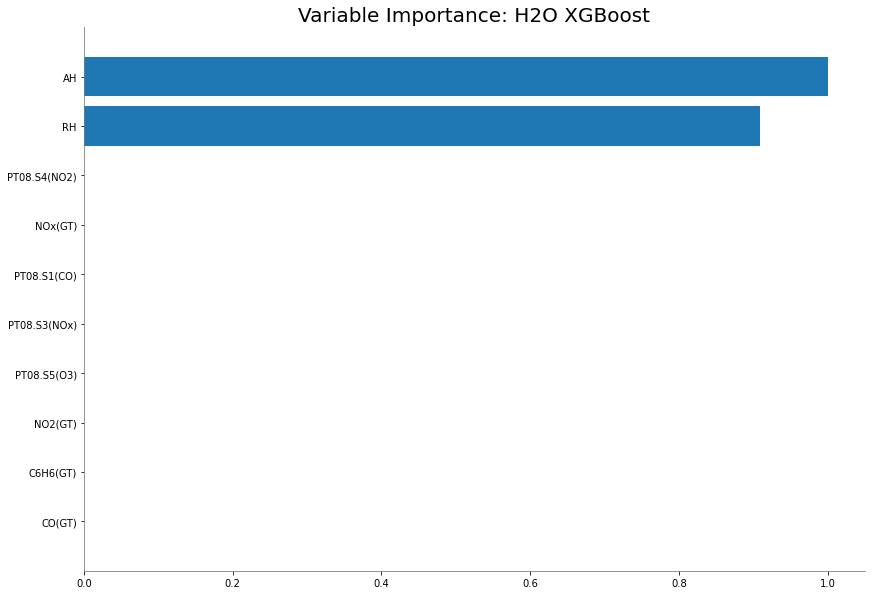

<Figure size 432x288 with 0 Axes>

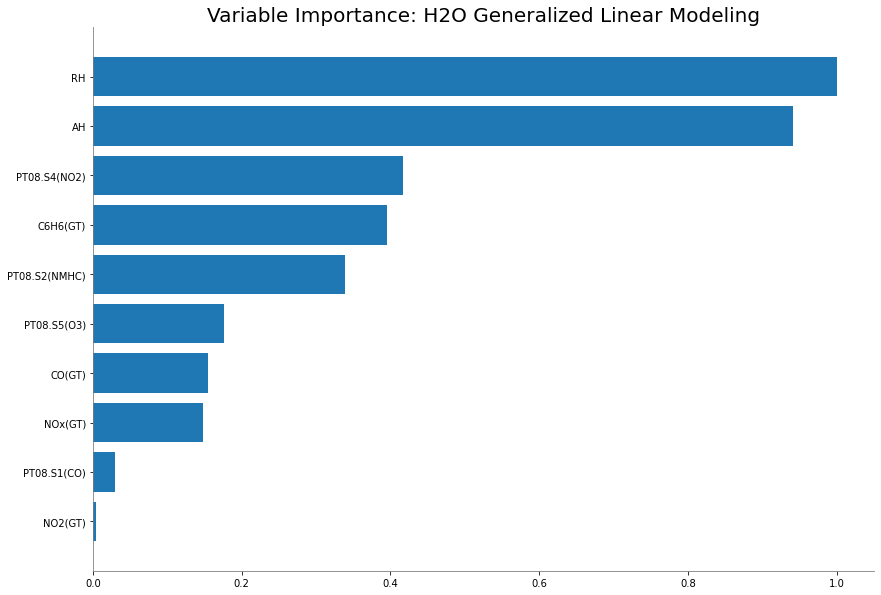

<Figure size 432x288 with 0 Axes>

In [52]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()
  test_model.varimp_plot()

23
glm


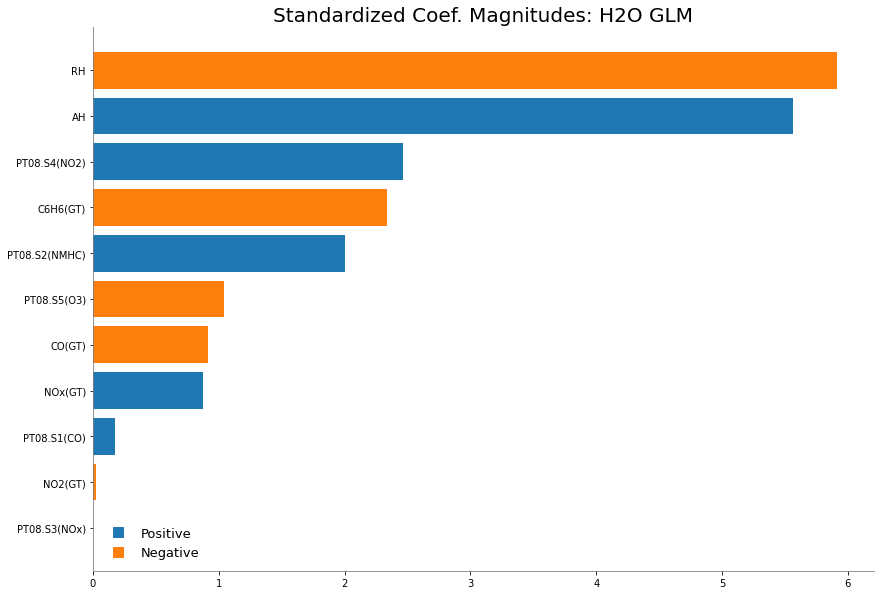

In [53]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(aml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo) 
  glm_model.std_coef_plot()

In [54]:
#Show the model’s rmse
print(best_model.rmse(train = True))
print(test_model.rmse(train = True))


0.22742513988350435
2.3198566790057935


In [55]:
#Show the model’s rmse and mse using in test set
def model_performance_stats(perf):
    d={}
    try:    
      d['mse']=perf.mse()
    except:
      pass      
    try:    
      d['rmse']=perf.rmse() 
    except:
      pass      
    try:    
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass      
    try:    
      d['residual_deviance']=perf.residual_deviance() 
    except:
      pass      
    try:    
      d['null_deviance']=perf.null_deviance() 
    except:
      pass      
    try:    
      d['aic']=perf.aic() 
    except:
      pass      
    try:
      d['logloss']=perf.logloss() 
    except:
      pass    
    try:
      d['auc']=perf.auc()
    except:
      pass  
    try:
      d['gini']=perf.gini()
    except:
      pass    
    return d

In [56]:
mod_perf=best_model.model_performance(s12_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.15550174594189228,
 'rmse': 0.3943370968370745,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None}

In [57]:
predictions = best_model.predict(s12_test)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


In [58]:

#Show the five prediction value 
y_pred=h2o.as_list(predictions)
y_pred[0:5]

,predict
0,10.229467
1,10.255051
2,10.455372
3,8.411039
4,9.858337


In [59]:
print(X)

['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH', 'AH']


PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20221103_203340_model_3 on column 'AH'.
ah        mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
0.1847    0.260426         3.49733            0.0419784
0.289747  1.77185          4.96766            0.0596267
0.394795  5.76396          5.76492            0.0691962
0.499842  8.87906          6.57849            0.0789614
0.604889  11.208           6.27266            0.0752906
0.709937  13.8647          6.35202            0.0762432
0.814984  15.9186          6.57222            0.0788863
0.920032  17.9734          6.72626            0.0807351
1.02508   19.9012          6.85979            0.0823379
1.13013   21.3241          6.87976            0.0825776
1.23517   22.8464          6.97316            0.0836986
1.34022   24.1029          6.87445            0.0825139
1.44527   25.5016          6.71837            0.0806404
1.55032   26.

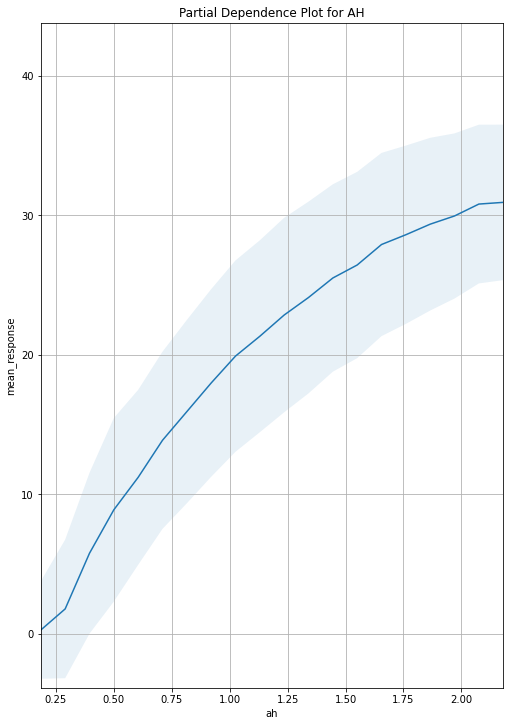

In [60]:
#How AH influence Temperature in the best Model(XGBoost)
best_model.partial_plot(s12, cols=['AH'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GLM_1_AutoML_1_20221103_203340 on column 'RH'.
rh       mean_response    stddev_response    std_error_mean_response
-------  ---------------  -----------------  -------------------------
9.2      31.1895          6.95864            0.0835244
13.3842  29.7719          6.95864            0.0835244
17.5684  28.3543          6.95864            0.0835244
21.7526  26.9366          6.95864            0.0835244
25.9368  25.519           6.95864            0.0835244
30.1211  24.1014          6.95864            0.0835244
34.3053  22.6837          6.95864            0.0835244
38.4895  21.2661          6.95864            0.0835244
42.6737  19.8485          6.95864            0.0835244
46.8579  18.4308          6.95864            0.0835244
51.0421  17.0132          6.95864            0.0835244
55.2263  15.5956          6.95864            0.0835244
59.4105  14.1779          6.95864            0.0835244
63.5947  12.7603          6.95864            

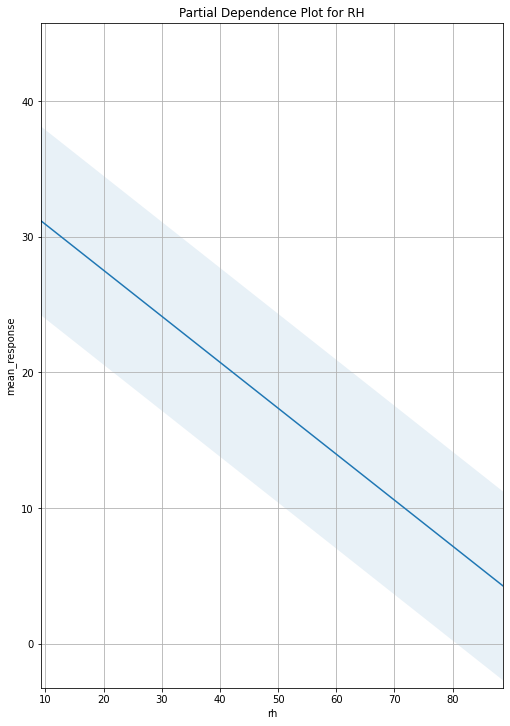

In [61]:

#How RH influence Temperature in the test Model(GLM)
test_model.partial_plot(s12, cols=['RH'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model XGBoost_grid_1_AutoML_1_20221103_203340_model_3 on column 'CO(GT)'.
cogt      mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
0.1       17.7933          8.86618            0.106421
0.721053  17.7588          8.84084            0.106116
1.34211   17.7574          8.84331            0.106146
1.96316   17.7506          8.84613            0.10618
2.58421   17.744           8.84703            0.106191
3.20526   17.7452          8.84785            0.106201
3.82632   17.7719          8.84634            0.106182
4.44737   17.8589          8.85453            0.106281
5.06842   17.8276          8.86171            0.106367
5.68947   17.8161          8.86139            0.106363
6.31053   17.7701          8.85617            0.1063
6.93158   17.8592          8.84783            0.1062
7.55263   17.8592          8.84783            0.1062
8.17368   17.8591          8.

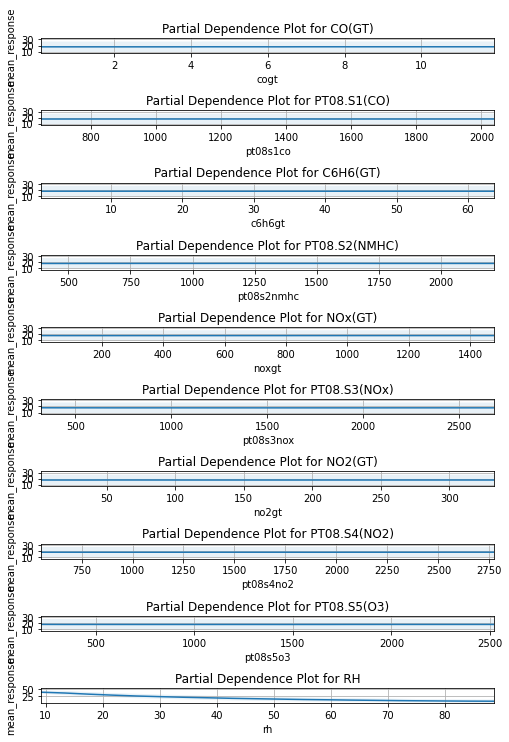

In [62]:
#How Other variable influence the temperature in the best Model(XGBoost)
best_model.partial_plot(s12, cols=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'RH'])

PartialDependencePlot progress: |████████████████████████████████████████████████| (done) 100%


[PartialDependence: Partial Dependence Plot of model GLM_1_AutoML_1_20221103_203340 on column 'CO(GT)'.
cogt      mean_response    stddev_response    std_error_mean_response
--------  ---------------  -----------------  -------------------------
0.1       19.0788          8.5717             0.102886
0.721053  18.6811          8.5717             0.102886
1.34211   18.2833          8.5717             0.102886
1.96316   17.8855          8.5717             0.102886
2.58421   17.4878          8.5717             0.102886
3.20526   17.09            8.5717             0.102886
3.82632   16.6922          8.5717             0.102886
4.44737   16.2945          8.5717             0.102886
5.06842   15.8967          8.5717             0.102886
5.68947   15.499           8.5717             0.102886
6.31053   15.1012          8.5717             0.102886
6.93158   14.7034          8.5717             0.102886
7.55263   14.3057          8.5717             0.102886
8.17368   13.9079          8.5717      

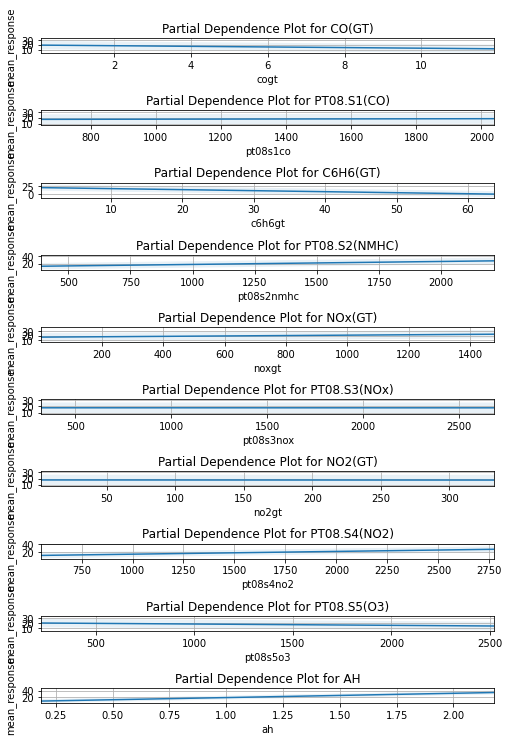

In [63]:
#How Other variable influence the temperature in the test Model(GLM)
test_model.partial_plot(s12, cols=['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'AH'])

# Questions:
# 1.Is the relationship significant?

```
air_glm = H2OGeneralizedLinearEstimator( lambda_ = 0,
                        remove_collinear_columns = True,
                          compute_p_values = True)
air_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)
coeff_table = air_glm._model_json['output']['coefficients_table']
coeff_table.as_data_frame()
```





```
index	names	coefficients	std_error	z_value	p_value	standardized_coefficients
0	Intercept	 7.11793	0.80682	8.82215	  1.51255e-18	  17.74632
1	CO(GT)  	-0.54965	0.07564	-7.26591	 4.25861e-13	  -0.79869
2	PT08.S1(CO)	0.00082	0.00043	1.89765	  0.05779	    0.18126
3	C6H6(GT)	 -0.37711	0.03013	-12.51577	 1.99235e-35	  -2.81680
4	PT08.S2(NMHC)   0.00941	0.00099	9.492158	  3.36725e-21	  2.48682
5	NOx(GT)	  0.00435	0.00045	9.67602	  5.85271e-22	  0.90412
6	PT08.S3(NOx)    0.00053	0.00029	1.81010	  0.07033	    0.13542
7	NO2(GT)	  0.00023	0.00148	0.15567	  0.876297	    0.01098
8	PT08.S4(NO2)	0.00677	0.00039	17.21319	 1.30833e-64	  2.38963
9	PT08.S5(O3)	-0.00259	0.00023	-11.19914	 8.82060e-29	 -1.06251
10	RH	    -0.34088	0.00264	-129.11729	0.0	      -5.91508
11	AH	    14.07621	0.18313	76.86338	 0.0	      5.65553
```



**Here we can take a look at the z_value. The sheet below show the relation between z_value and the significance. In GLM model ,except NO2(GT), PT08.S3(NOx),PT08.S1(CO) are less than abs(1.96) .Other variable is significant to the response.**
```
Z_score	percent	Confidence level
< -1.65 or > +1.65	< 0.10	90%
< -1.96 or > +1.96	< 0.05	95%
< -2.58 or > +2.58	< 0.01	99%
```












# 2.Are any model assumptions violated?
**Yes. Beacuse we’ve built and show 2 models. The one other than GLM is XGBoost which is not a linear model. In this model you can see that the importance are all almost 0 except AH and RH. It shows that AH , RH and other predictors are multicollinearity.** 

# 3.Is there any multicollinearity in the model?
**Yes.there shows multicollinearity between AH , RH and other variable  . You
 can see it at pic1**


# 4.In the multivariate models are predictor variables independent of all the other predictor variables?
**NO.As the question above I’ve mentioned. There is  multicollinearity exist in the model**


# 5.In  multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.
**This answer also shows at the pic1 and pic2,using varimp_plot() to achieve this goal**


# 6.Does the model make sense?
**I believe that various contaminations cause changes in relative humidity. Pollution is caused by the movement of air molecules and humidity is caused by water molecules, so they interfere with each other. That is, changes in humidity can infer changes in contamination and vice versa. So one of them contains the other. It's humidity. Of course, humidity affects temperature. Here's how I see the relationship between these factors. Of course, these two models proved my point. It makes sense.**

# 7.Does regularization help?
**The goal when choosing a value for lambda is to strike the right balance between simplification of the training data and fitting:**
**If the lambda value is too high, the model will be simple, but there is a risk that the data will not fit. The model cannot get enough information from the training data to make useful predictions**
**A too low lambda value complicates the model and risks overfitting the data. The model cannot generalize to new data because there is too much information about the features in the training data. Setting the lambda to 0 denormalizes it completely. In this case, the sole purpose of training is to minimize loss, which maximizes the risk of overfitting. Here, we first try without regularization.**

```
ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5.381398766303806
RMSE: 2.319784206839896
MAE: 1.7330995846829758
RMSLE: NaN
Mean Residual Deviance: 5.381398766303806
R^2: 0.9305479817767031
Null degrees of freedom: 5229
Residual degrees of freedom: 5218
Null deviance: 405239.7074665335
Residual deviance: 28144.715547768905
AIC: 23669.916844757732
ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5.609249919994379
RMSE: 2.368385509159009
MAE: 1.7658793108424014
RMSLE: NaN
Mean Residual Deviance: 5.609249919994379
R^2: 0.9302933699941162
Null degrees of freedom: 1710
Residual degrees of freedom: 1699
Null deviance: 137696.5594821324
Residual deviance: 9597.426613110381
AIC: 7832.085158738636

```


 
**As we can see, the MSE of training set and test set are low.and are nearly same , so we can easily eliminate that the model is overfitting. Beasuse if it is. the test set accuracy will be much worse than test set..then we add a lambda to apply regularization to see what wil happen**



```
air_glm = H2OGeneralizedLinearEstimator(   lambda_= 1,
                        remove_collinear_columns = True,
                          )
air_glm.train(x = X, y = y, training_frame = s12_train, validation_frame = s12_test)
```



** Reported on train data. **

```
ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 5.601209046729513
RMSE: 2.3666873571998295
MAE: 1.7637743592905442
RMSLE: NaN
Mean Residual Deviance: 5.601209046729513
R^2: 0.9277111231336703
Null degrees of freedom: 5229
Residual degrees of freedom: 5222
Null deviance: 405239.7074665335
Residual deviance: 29294.32331439535
AIC: 23871.29540491542
ModelMetricsRegressionGLM: glm
** Reported on validation data. **

MSE: 5.800952914347432
RMSE: 2.4085167457062515
MAE: 1.7795354059075164
RMSLE: NaN
Mean Residual Deviance: 5.800952914347432
R^2: 0.9279110604359779
Null degrees of freedom: 1710
Residual degrees of freedom: 1703
Null deviance: 137696.5594821324
Residual deviance: 9925.430436448456
AIC: 7881.58364420098
```


**In this case, the MSE of both the training and test sets increases. Therefore the model will be inaccurate. Meanwhile, the two are still good friends. This also proves that the model is not overfitted. Lambda (regularization) helps reduce the risk of overfitting. Simplify the model. Obviously, it's of little help in this case. We can conclude that regularization is useless for GLM models. **


# 8.Which independent variables are significant?
**Obviously, AH and RH are the most significant variable.and the other variable’s importance are shown both on the Question1 and pic1,2**

# 9.Which hyperparameters are important?
**Here are the hyperparameters in GBM Modeling(XGBoost is a king of Gradient Boosted models):**
```
ntrees: Number of trees. Defaults to 50.
max_depth: Maximum tree depth. Defaults to 5.
min_rows: Fewest allowed (weighted) observations in a leaf. Defaults to 10.
learn_rate: Learning rate (from 0.0 to 1.0) Defaults to 0.1.
learn_rate_annealing: Scale the learning rate by this factor after each tree
```




```

Hyper-Parameter Search Summary: ordered by increasing residual_deviance
col_sample_rate	learn_rate	max_depth	sample_rate	model_ids	residual_deviance
1.0	0.1	9.0	0.8	gbm_grid1_model_18	0.0477888
1.0	0.1	9.0	1.0	gbm_grid1_model_36	0.0552215
1.0	0.1	5.0	0.8	gbm_grid1_model_12	0.0991365
1.0	0.1	5.0	1.0	gbm_grid1_model_30	0.1036601
1.0	0.1	3.0	1.0	gbm_grid1_model_24	0.2917608
1.0	0.1	3.0	0.8	gbm_grid1_model_6	0.3058264
0.5	0.1	9.0	0.8	gbm_grid1_model_17	0.3778339
0.5	0.1	9.0	1.0	gbm_grid1_model_35	0.3922024
0.5	0.1	5.0	1.0	gbm_grid1_model_29	0.4164274
0.5	0.1	5.0	0.8	gbm_grid1_model_11	0.4405302
```

**As we can see when we adjust hyperparameters to learn_rate=0.1, max_depth=9.0, sample_rate=0.8. The model building wil;; have the best performance**

Copyright (c) [2022] [Ping Chen]

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.